In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
def load_data(file_path, sep=':::', columns=['ID', 'TITLE', 'GENRE', 'DESCRIPTION']):
    return pd.read_csv(file_path, sep=sep, names=columns, engine='python')

train_data = load_data("train_data.txt")
test_data = load_data("test_data.txt")
test_solution_data = load_data("test_data_solution.txt")

In [27]:
def display_data_info(data, name):
    print(f"{name} Data Head:")
    display(data.head())
    print(f"{name} Data Shape: {data.shape}\n")

display_data_info(train_data, "Train")
display_data_info(test_data, "Test")
display_data_info(test_solution_data, "Test Solution")

train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)

Train Data Head:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


Train Data Shape: (54214, 4)

Test Data Head:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


Test Data Shape: (54200, 4)

Test Solution Data Head:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


Test Solution Data Shape: (54200, 4)



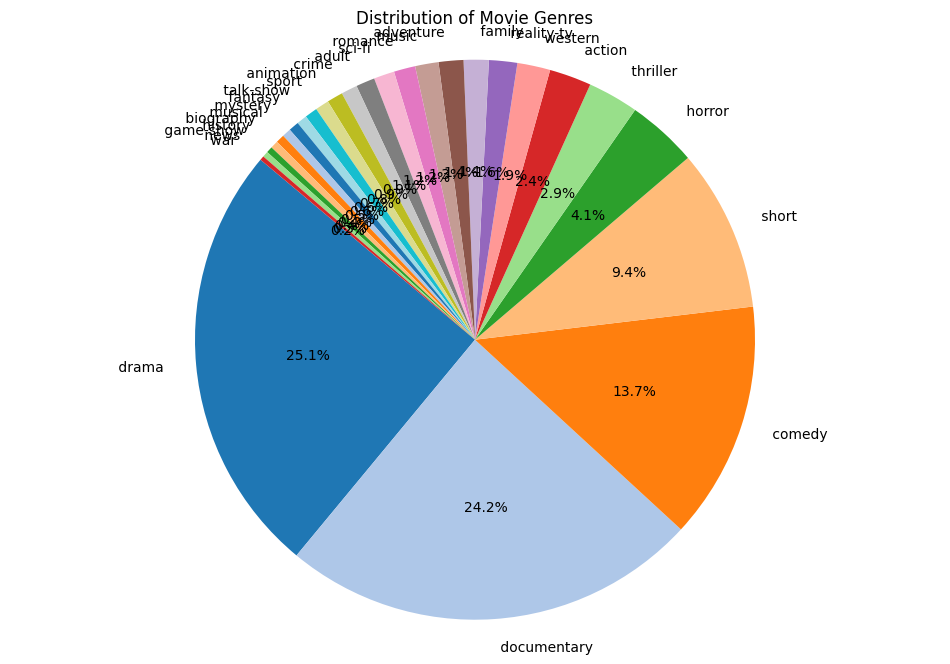

In [28]:
plt.figure(figsize=(12, 8))
train_genre_counts = train_data['GENRE'].value_counts()
plt.pie(train_genre_counts, labels=train_genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20", len(train_genre_counts)))
plt.title('Distribution of Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

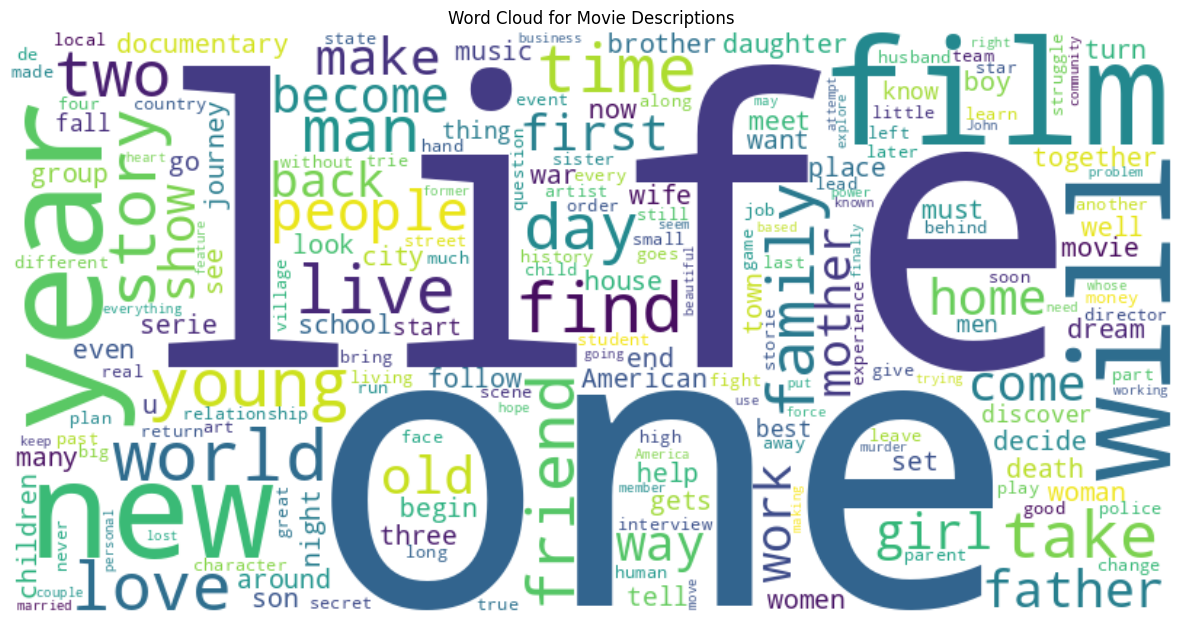

In [29]:
all_descriptions = " ".join(train_data['DESCRIPTION'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, collocations=False).generate(all_descriptions)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Descriptions')
plt.show()

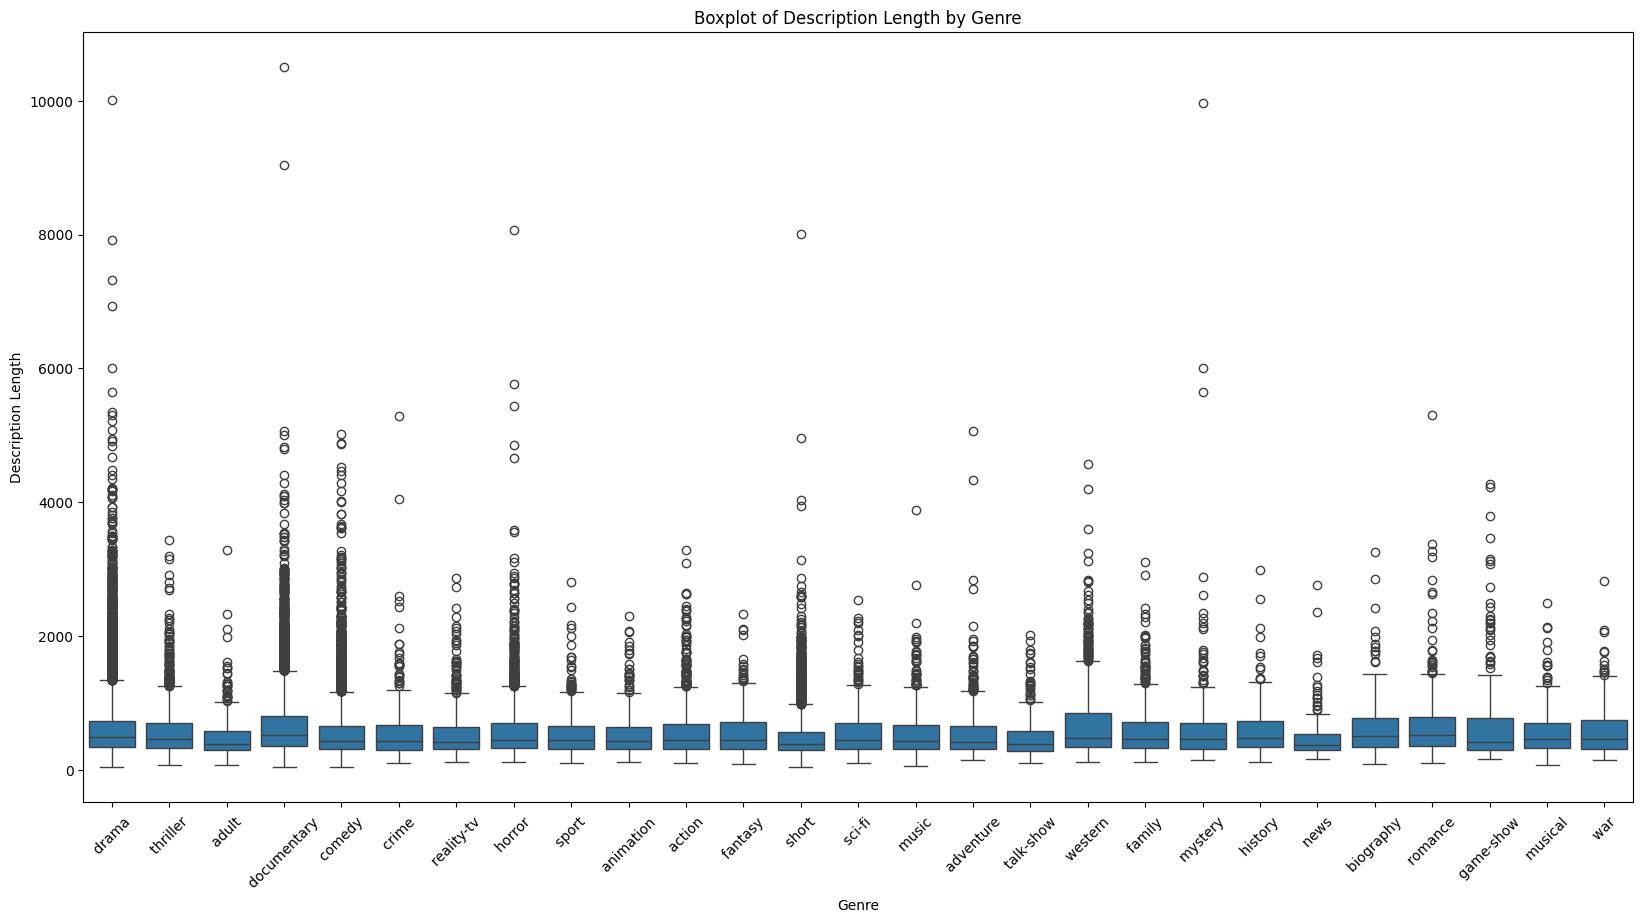

In [30]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Boxplot of Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

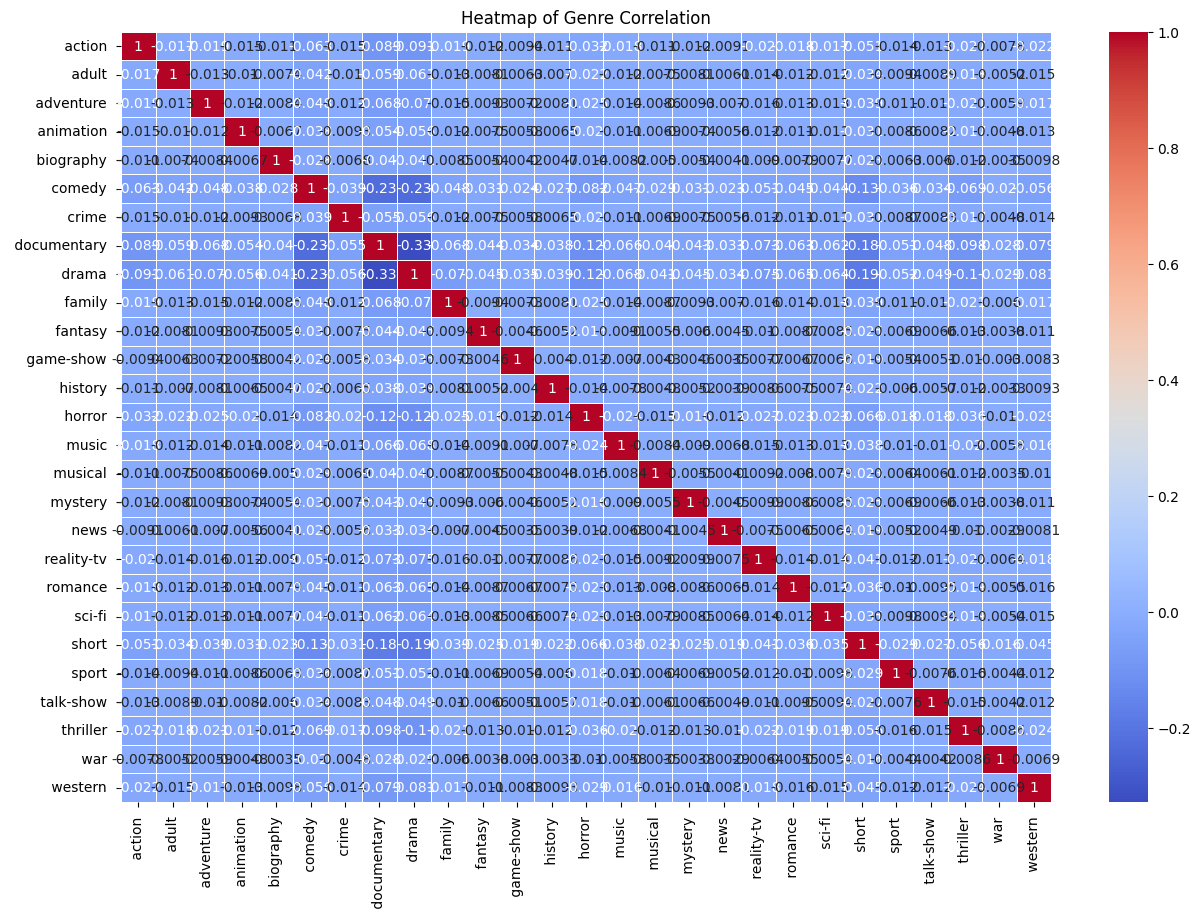

In [31]:
genres = train_data['GENRE'].str.get_dummies()

corr_matrix = genres.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Genre Correlation')
plt.show()


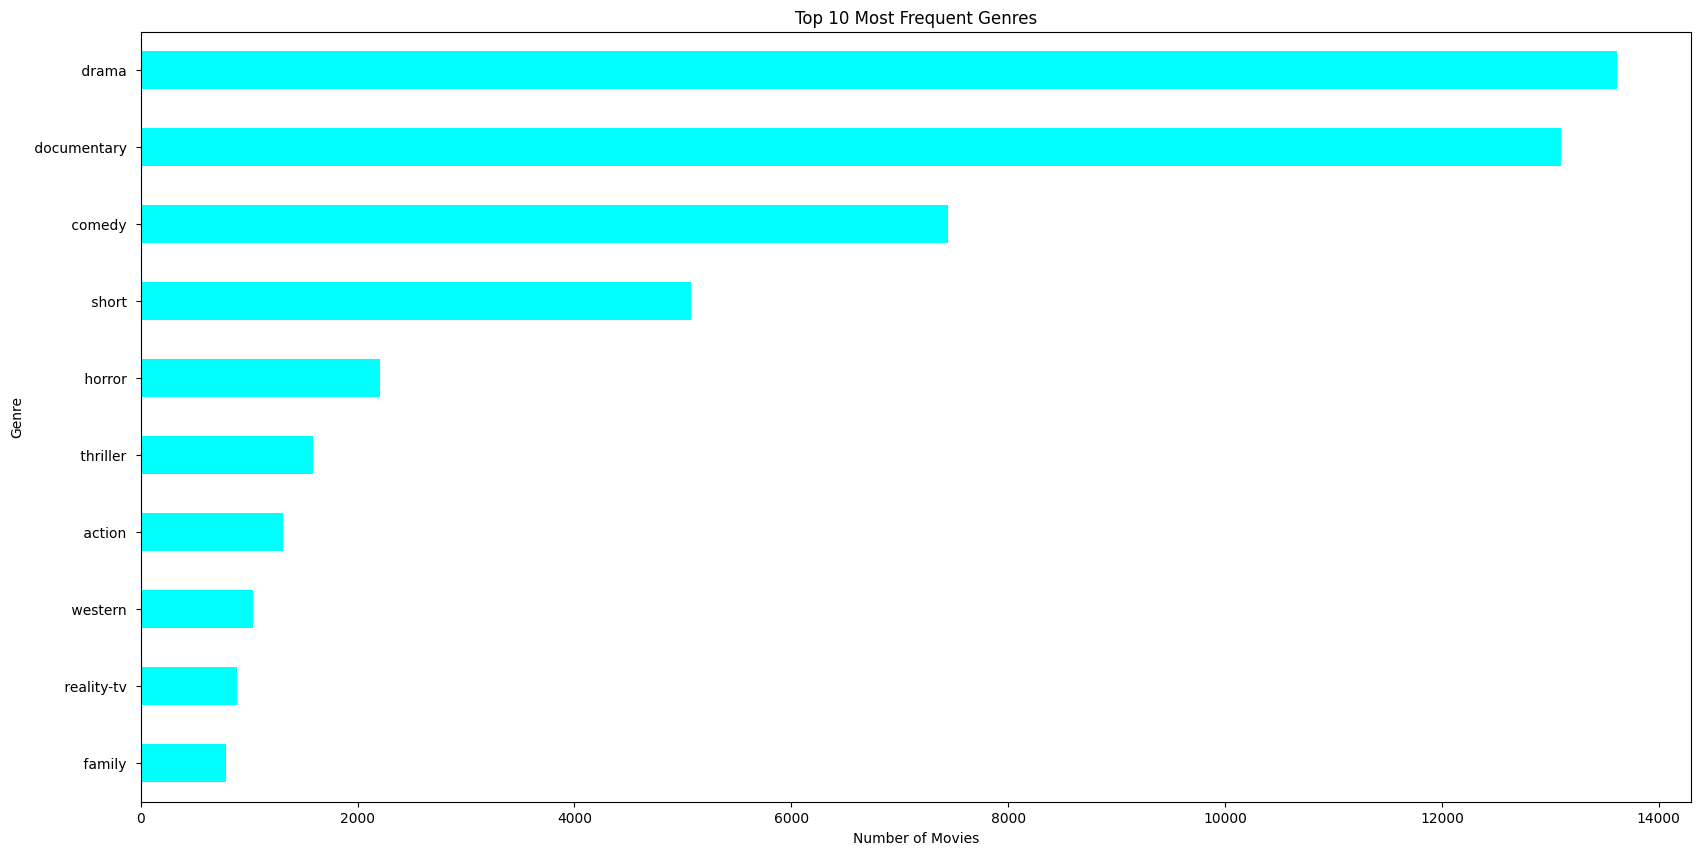

In [32]:
top_genres = train_data['GENRE'].value_counts().head(10)
plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()
plt.show()

In [33]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = vectorizer.fit_transform(train_data['DESCRIPTION'])
X_test = vectorizer.transform(test_data['DESCRIPTION'])

In [34]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [35]:
def train_and_evaluate_model(model, X_train_sub, y_train_sub, X_val, y_val):
    model.fit(X_train_sub, y_train_sub)
    y_val_pred = model.predict(X_val)
    print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
    print(f"Validation Classification Report:\n{classification_report(y_val, y_val_pred)}")
    return model

svc_model = LinearSVC()
svc_model = train_and_evaluate_model(svc_model, X_train_sub, y_train_sub, X_val, y_val)

Validation Accuracy: 0.5836945494789265
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
       

In [36]:
def evaluate_test_set(model, X_test, y_test):
    y_test_pred = model.predict(X_test)
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")
    return y_test_pred

evaluate_test_set(svc_model, X_test, y_test)

Test Accuracy: 0.09357933579335793
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([21, 21, 21, ..., 21, 21, 21])

In [37]:
nb_model = MultinomialNB()
nb_model = train_and_evaluate_model(nb_model, X_train_sub, y_train_sub, X_val, y_val)
evaluate_test_set(nb_model, X_test, y_test)

lr_model = LogisticRegression(max_iter=500)
lr_model = train_and_evaluate_model(lr_model, X_train_sub, y_train_sub, X_val, y_val)
evaluate_test_set(lr_model, X_test, y_test)

Validation Accuracy: 0.4465553813520243
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.60      0.05      0.09      1443
           6       0.00      0.00      0.00       107
           7       0.53      0.90      0.67      2659
           8       0.38      0.88      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Validation Accuracy: 0.5784377017430601
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.20      0.30       263
           1       0.86      0.17      0.28       112
           2       0.47      0.10      0.17       139
           3       1.00      0.03      0.06       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.55      1443
           6       1.00      0.01      0.02       107
           7       0.65      0.86      0.74      2659
           8       0.53      0.81      0.64      2697
           9       0.43      0.04      0.07       150
          10       0.00      0.00      0.00        74
          11       0.92      0.28      0.42        40
          12       0.00      0.00      0.00        45
          13       0.68      0.55      0.61       431
          14       0.66      0.35      0.45       144
          15       0.00      0.00      0.00        50
       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

array([8, 8, 8, ..., 8, 8, 8])

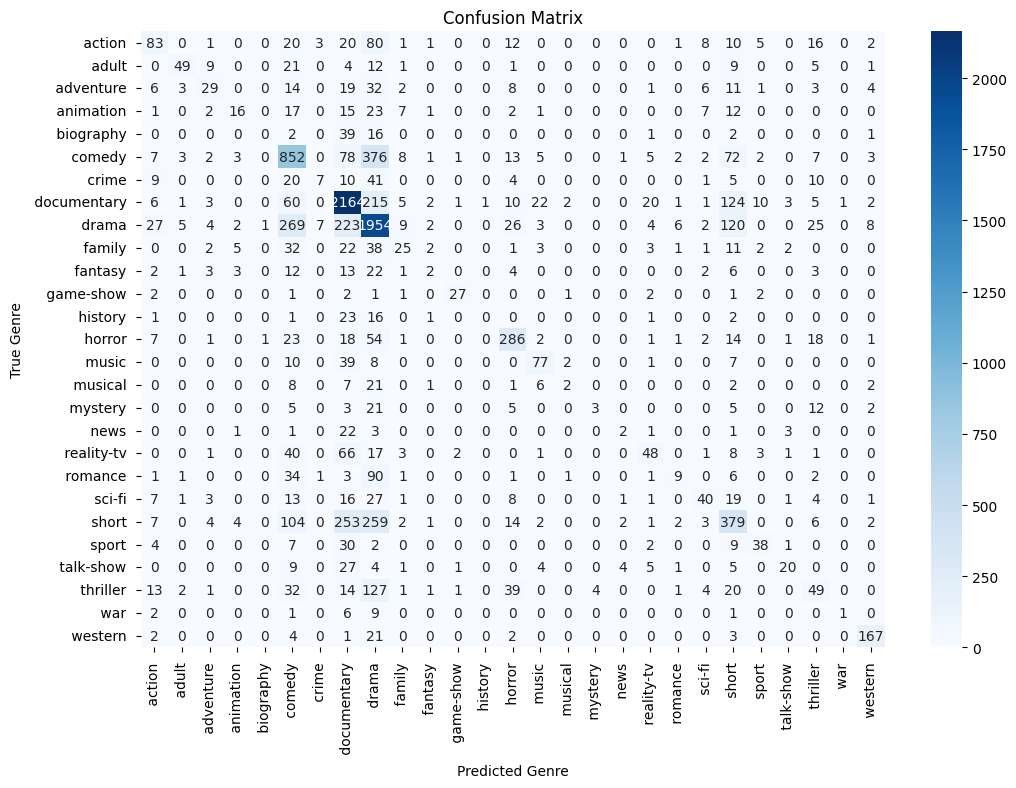

In [38]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Genre')
    plt.ylabel('True Genre')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_val, svc_model.predict(X_val), label_encoder.classes_)